In [104]:
import os
import re
import scipy
from scipy import stats
import pickle
import subprocess
import shlex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [106]:
raw_df = pd.read_csv('sph6004_assignment1_data.csv')

In [107]:
raw_df.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,mbp_min,mbp_max,mbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,temperature_min,temperature_max,temperature_mean,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,glucose_mean,lactate_min,lactate_max,ph_min,ph_max,so2_min,so2_max,po2_min,po2_max,pco2_min,pco2_max,aado2_min,aado2_max,aado2_calc_min,aado2_calc_max,pao2fio2ratio_min,pao2fio2ratio_max,baseexcess_min,baseexcess_max,bicarbonate_min,bicarbonate_max,totalco2_min,...,atyps_max,bands_min,bands_max,imm_granulocytes_min,imm_granulocytes_max,metas_min,metas_max,nrbc_min,nrbc_max,d_dimer_min,d_dimer_max,fibrinogen_min,fibrinogen_max,thrombin_min,thrombin_max,inr_min,inr_max,pt_min,pt_max,ptt_min,ptt_max,alt_min,alt_max,alp_min,alp_max,ast_min,ast_max,amylase_min,amylase_max,bilirubin_total_min,bilirubin_total_max,bilirubin_direct_min,bilirubin_direct_max,bilirubin_indirect_min,bilirubin_indirect_max,ck_cpk_min,ck_cpk_max,ck_mb_min,ck_mb_max,ggt_min,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,36570066,3,F,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,116.136364,40.0,58.0,47.863636,56.0,69.0,63.090909,13.0,24.0,16.833333,35.89,36.39,36.222000,96.0,100.0,98.916667,76.0,211.0,146.2,2.3,2.3,7.40,7.40,98.0,98.0,101.0,101.0,47.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,30.0,...,0.0,5.0,11.0,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.1,11.9,12.0,28.6,29.5,103.0,133.0,992.0,1199.0,106.0,196.0,NaN,NaN,6.8,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.0,318.0,15.0,6.0,5.0,4.0,0.0,157.0,110.0
1,39307659,0,F,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,109.833333,56.0,89.0,70.166667,65.0,96.0,79.555556,17.0,38.0,29.611111,36.28,37.00,36.558000,91.0,98.0,95.444444,127.0,132.0,129.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,2.3,20.0,24.7,28.4,150.0,272.0,384.0,282.0,331.0,183.0,356.0,NaN,NaN,1.9,2.9,NaN,NaN,NaN,NaN,175.0,175.0,8.0,8.0,NaN,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,82.0
2,38743306,2,F,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,112.153846,56.0,99.0,73.307692,69.0,108.0,85.692308,14.0,19.0,16.000000,36.67,37.00,36.805000,94.0,100.0,97.166667,207.0,305.0,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.1,12.1,12.1,26.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,62.1
3,32339865,2,F,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,138.160000,60.0,94.0,80.200000,71.0,109.0,96.720000,14.0,31.0,22.518519,36.83,37.28,37.087143,89.0,100.0,94.800000,111.0,120.0,117.0,1.7,1.7,7.38,7.50,70.0,70.0,42.0,64.0,49.0,65.0,NaN,NaN,144.95,166.95,142.5,160.0,9.0,12.0,NaN,NaN,40.0,...,NaN,NaN,NaN,0.4,0.4,NaN,NaN,1.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,1.2,1.2,12.8,12.8,26.1,26.1,10.0,10.0,76.0,76.0,18.0,18.0,NaN,NaN,0.7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1.0,0.0,1.0,1.0,170.0,113.1
4,35526987,2,M,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,97.672131,47.0,95.0,61.827869,56.0,100.0,70.475806,18.0,32.0,24.230159,36.78,38.33,37.158750,90.0,99.0,95.951613,158.0,213.0,187.0,1.5,2.8,7.30,7.35,80.0,80.0,45.0,216.0,31.0,39.0,452.0,631.0,441.15,621.75,45.0,216.0,-7.0,-4.0,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.1,10.4,11.9,27.7,39.4,20.0,20.0,60.0,60.0,21.0,21.0,NaN,NaN,0.6,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,0.0,1.0,1.0,178.0,97.4


In [108]:
raw_df.describe()

,id,aki,admission_age,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,mbp_min,mbp_max,mbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,temperature_min,temperature_max,temperature_mean,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,glucose_mean,lactate_min,lactate_max,ph_min,ph_max,so2_min,so2_max,po2_min,po2_max,pco2_min,pco2_max,aado2_min,aado2_max,aado2_calc_min,aado2_calc_max,pao2fio2ratio_min,pao2fio2ratio_max,baseexcess_min,baseexcess_max,bicarbonate_min,bicarbonate_max,totalco2_min,totalco2_max,hematocrit_min,...,atyps_max,bands_min,bands_max,imm_granulocytes_min,imm_granulocytes_max,metas_min,metas_max,nrbc_min,nrbc_max,d_dimer_min,d_dimer_max,fibrinogen_min,fibrinogen_max,thrombin_min,thrombin_max,inr_min,inr_max,pt_min,pt_max,ptt_min,ptt_max,alt_min,alt_max,alp_min,alp_max,ast_min,ast_max,amylase_min,amylase_max,bilirubin_total_min,bilirubin_total_max,bilirubin_direct_min,bilirubin_direct_max,bilirubin_indirect_min,bilirubin_indirect_max,ck_cpk_min,ck_cpk_max,ck_mb_min,ck_mb_max,ggt_min,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
count,5.092000e+04,50920.000000,50920.000000,50841.000000,50841.000000,50841.000000,50823.000000,50823.000000,50823.000000,50823.000000,50823.000000,50823.000000,50805.000000,50805.000000,50805.000000,50777.000000,50777.000000,50777.000000,49279.000000,49279.000000,49279.000000,50797.000000,50797.000000,50797.000000,49746.000000,49746.000000,49746.000000,27161.000000,27161.000000,31172.000000,31172.000000,15699.000000,15699.000000,31177.000000,31177.000000,31176.000000,31176.000000,3492.000000,3492.000000,21085.000000,21085.000000,21085.000000,21085.000000,31176.000000,31176.000000,849.000000,849.000000,31176.000000,31176.000000,14215.000000,...,5896.000000,6493.000000,6493.000000,11001.000000,11001.000000,6006.000000,6006.000000,2105.000000,2105.000000,109.000000,109.000000,14918.000000,14918.000000,91.000000,91.000000,45848.000000,45848.000000,45849.000000,45849.000000,45576.000000,45576.000000,25093.00000,25093.000000,24909.000000,24909.000000,25190.000000,25190.000000,3313.00000,3313.000000,24883.000000,24883.000000,2192.000000,2192.000000,2097.000000,2097.000000,15885.000000,15885.000000,14633.000000,14633.000000,472.000000,472.000000,14689.000000,14689.000000,50685.000000,50266.000000,50407.000000,50542.000000,50685.000000,25011.000000,49900.000000
mean,3.498391e+07,1.300393,64.942008,69.902996,102.494951,84.266427,93.250232,148.234674,119.102894,47.337019,88.367586,63.884527,60.148942,105.399347,79.047296,12.325135,27.546813,18.987225,36.305509,37.337707,36.827624,91.786405,99.413883,96.806198,150.334439,839.621426,288.537646,1.732144,2.971846,7.315798,7.413082,87.308063,91.922185,93.845271,229.486705,36.784033,47.510104,414.345361,436.997423,153.843219,322.178426,205.268311,337.854298,-3.185591,0.435656,21.866431,22.270436,22.884879,26.549622,29.152726,...,0.504919,4.574973,6.230787,0.745741,0.788783,0.792524,1.232734,2.917435,3.538907,3628.431193,3751.412844,266.046095,284.990646,47.798901,49.300000,1.305189,1.523640,14.337610,16.586131,31.083967,42.127078,107.45959,165.009385,103.413666,113.200409,144.498563,261.601032,104.03441,118.009055,1.512587,1.766214,3.149818,3.448038,1.691750,1.863853,843.181555,1438.406232,14.961245,25.778043,154.966102,155.271186,470.911158,582.595412,13.702141,5.167549,3.385066,3.124471,0.205643,169.628199,81.537677
std,2.893873e+06,1.088128,17.278264,15.141810,20.481365,15.726366,17.550959,22.737214,16.375046,11.743710,19.676032,11.297666,13.815524,24.884746,11.212987,3.554713,6.374043,3.724961,0.712031,0.715446,0.531014,6.583808,1.423693,2.452735,6340.018017,25743.268979,8423.477281,1.415528,2.650514,0.108188,0.075657,16.365570,13.106047,69.959744,152.515218,9.201947,13.650260,140.061168,146.637973,132.803740,169.553209,125.222209,178.170037,6.191688,5.002732,6.137921,6.076523,5.604689,5.202051,6.967358,...,1.626115,7.330910,9.099399,0.540364,0

In [109]:
print(raw_df.gender.unique())
print(raw_df.race.unique())

['F' 'M']
['BLACK/AFRICAN AMERICAN' 'WHITE - RUSSIAN' 'WHITE' 'UNKNOWN' 'ASIAN'
 'OTHER' 'HISPANIC OR LATINO' 'UNABLE TO OBTAIN' 'WHITE - OTHER EUROPEAN'
 'ASIAN - CHINESE' 'PATIENT DECLINED TO ANSWER' 'ASIAN - KOREAN'
 'BLACK/AFRICAN' 'MULTIPLE RACE/ETHNICITY' 'WHITE - EASTERN EUROPEAN'
 'HISPANIC/LATINO - PUERTO RICAN' 'BLACK/CARIBBEAN ISLAND'
 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER' 'BLACK/CAPE VERDEAN'
 'HISPANIC/LATINO - SALVADORAN' 'WHITE - BRAZILIAN'
 'HISPANIC/LATINO - DOMINICAN' 'PORTUGUESE' 'ASIAN - SOUTH EAST ASIAN'
 'SOUTH AMERICAN' 'HISPANIC/LATINO - MEXICAN' 'ASIAN - ASIAN INDIAN'
 'HISPANIC/LATINO - GUATEMALAN' 'HISPANIC/LATINO - HONDURAN'
 'HISPANIC/LATINO - CUBAN' 'AMERICAN INDIAN/ALASKA NATIVE'
 'HISPANIC/LATINO - CENTRAL AMERICAN' 'HISPANIC/LATINO - COLUMBIAN']


In [110]:
# encoding female to 0, male to 1

raw_df.loc[raw_df.gender == 'F', 'gender'] = 0
raw_df.loc[raw_df.gender == 'M', 'gender'] = 1

In [111]:
# dropping features with > 50% missing values
missing_percentage = (raw_df.isna().sum() / len(raw_df)) * 100

# Identify features with more than 50% missing values
features_to_drop = missing_percentage[missing_percentage >= 50].index

print(len(features_to_drop))

raw_df_filtered = raw_df.drop(columns=features_to_drop)
raw_df_filtered.shape

75


(50920, 87)

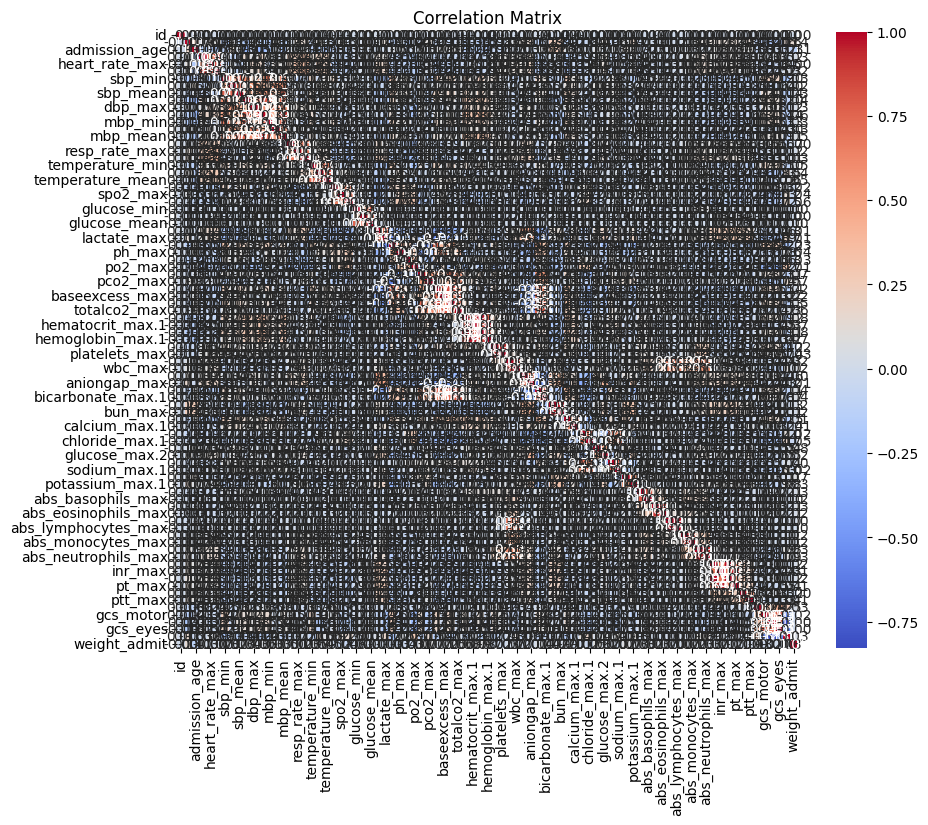

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the features
correlation_matrix = raw_df_filtered.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [113]:
# threshold = 0.7  # Define your threshold for correlation
# high_correlation_pairs = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)

# print(high_correlation_pairs)

In [114]:
import numpy as np

# Assuming 'correlation_matrix' is your correlation matrix obtained previously
threshold = 0.7

# Create a mask to select only the upper triangular part of the correlation matrix (excluding the diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Find the indices of highly correlated pairs
highly_correlated_pairs = np.where((correlation_matrix.abs() > threshold) & mask)

# Print the highly correlated pairs
for i, j in zip(*highly_correlated_pairs):
    print(f"Features '{correlation_matrix.index[i]}' and '{correlation_matrix.columns[j]}' are highly correlated with a correlation coefficient of {correlation_matrix.iloc[i, j]:.2f}.")

Features 'heart_rate_min' and 'heart_rate_mean' are highly correlated with a correlation coefficient of 0.87.
Features 'heart_rate_max' and 'heart_rate_mean' are highly correlated with a correlation coefficient of 0.84.
Features 'sbp_min' and 'sbp_mean' are highly correlated with a correlation coefficient of 0.77.
Features 'sbp_max' and 'sbp_mean' are highly correlated with a correlation coefficient of 0.75.
Features 'sbp_mean' and 'mbp_mean' are highly correlated with a correlation coefficient of 0.76.
Features 'dbp_min' and 'dbp_mean' are highly correlated with a correlation coefficient of 0.79.
Features 'dbp_min' and 'mbp_min' are highly correlated with a correlation coefficient of 0.80.
Features 'dbp_min' and 'mbp_mean' are highly correlated with a correlation coefficient of 0.74.
Features 'dbp_mean' and 'mbp_mean' are highly correlated with a correlation coefficient of 0.91.
Features 'mbp_min' and 'mbp_mean' are highly correlated with a correlation coefficient of 0.70.
Features 't

In [115]:
correlated_features_to_drop = ['heart_rate_min', 
                               'heart_rate_max', 
                               'sbp_min', 
                               'sbp_max', 
                               'dbp_min', 
                               'mbp_min', 
                               'temperature_min', 
                               'temperature_max', 
                               'glucose_min', 
                               'ph_min', 
                               'pco2_min', 
                               'baseexcess_min', 
                               'totalco2_min', 
                               'bicarbonate_min.1',  
                               'hematocrit_min.1', 
                               'platelets_min', 
                               'wbc_min', 
                               'bun_min', 
                               'chloride_min.1', 
                               'sodium_min.1', 
                               'abs_basophils_min', 
                               'abs_eosinophils_min', 
                               'abs_lymphocytes_min', 
                               'abs_monocytes_min', 
                               'abs_neutrophils_min', 
                               'inr_min', 
                               'pt_min', 
                               'gcs_motor', 
                               'gcs_verbal',
                               'sbp_mean',
                               'dbp_mean',
                               'totalco2_max',
                               'hematocrit_max.1',
                               'hemoglobin_max.1',
                               'inr_max'
                              ]
                          

In [116]:
raw_df_filtered = raw_df_filtered.drop(columns=correlated_features_to_drop)
raw_df_filtered.shape

(50920, 52)

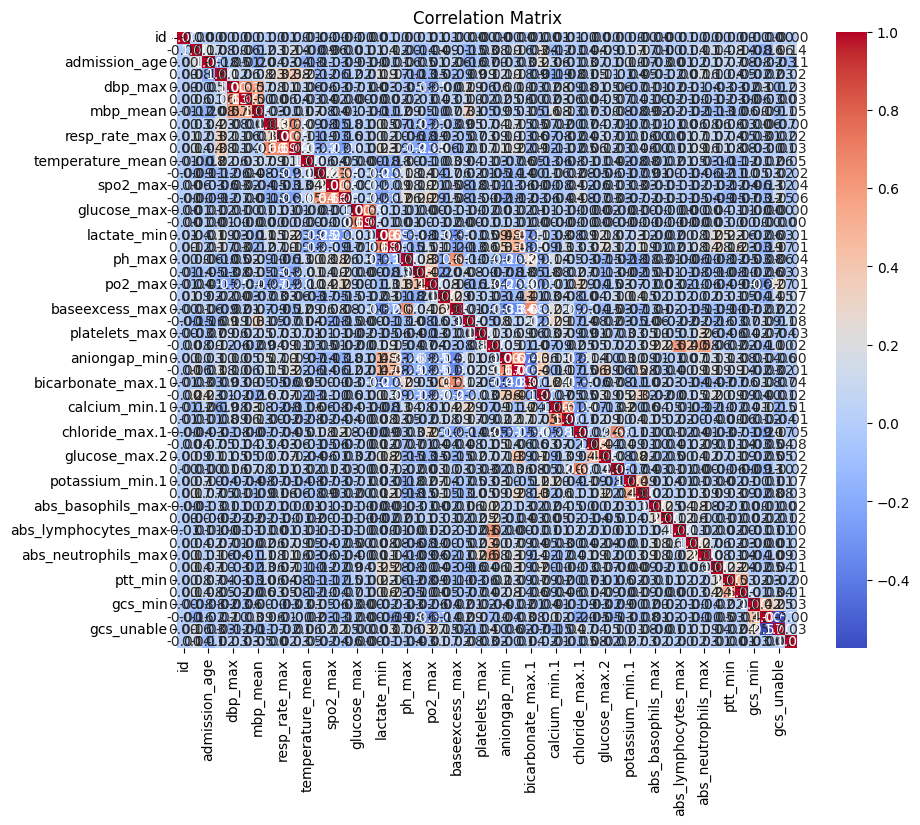

In [117]:
correlation_matrix = raw_df_filtered.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [119]:
import numpy as np

# Assuming 'correlation_matrix' is your correlation matrix obtained previously
threshold = 0.7

# Create a mask to select only the upper triangular part of the correlation matrix (excluding the diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Find the indices of highly correlated pairs
highly_correlated_pairs = np.where((correlation_matrix.abs() > threshold) & mask)

# Print the highly correlated pairs
for i, j in zip(*highly_correlated_pairs):
    print(f"Features '{correlation_matrix.index[i]}' and '{correlation_matrix.columns[j]}' are highly correlated with a correlation coefficient of {correlation_matrix.iloc[i, j]:.2f}.")

In [120]:
# just encoding all nan values to -1

raw_df_filledna = raw_df_filtered.fillna(-1)

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [122]:
X = raw_df_filledna.drop(['aki', 'race'], axis=1)
y = raw_df_filledna.aki

column_list = X.columns.tolist()

# Split dataset into training set, test set, and holdout set

X_train_temp, X_holdout, y_train_temp, y_holdout = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_temp, y_train_temp, test_size=0.22222, random_state=42) 

print(len(column_list))
print(X_train.shape)
print(X_test.shape)
print(X_holdout.shape)

50
(35644, 50)
(10184, 50)
(5092, 50)


In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
base_logistic_reg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, penalty='l2')
base_logistic_reg.fit(X_train, y_train)

C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [125]:
coefficients = base_logistic_reg.coef_

In [126]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

y_train_pred = base_logistic_reg.predict(X_train)
y_test_pred = base_logistic_reg.predict(X_test)

print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[8532    1 3260    4]
 [4013    0 2858    1]
 [6179    0 5262    3]
 [3005    0 2520    6]]
[[2400    0  937    2]
 [1127    0  834    0]
 [1788    0 1507    1]
 [ 828    0  758    2]]


In [73]:
coefficients = np.abs(base_logistic_reg.coef_)
sum_abs_coefficients = np.sum(coefficients, axis=0)


print(coefficients.shape)
print(sum_abs_coefficients.shape)


# print(sorted_indices)
# # Get the sorted coefficients and corresponding feature names (assuming X_train is your feature matrix)
# sorted_coefficients = coefficients_flat[sorted_indices]
# feature_names = np.array(X_train.columns).flatten()
# sorted_feature_names = feature_names[sorted_indices]

# # Print the sorted coefficients and corresponding feature names
# for coef, feat_name in zip(sorted_coefficients, sorted_feature_names):
#     print(feat_name, ':', coef)

(4, 85)
(85,)


In [74]:
feature_names = X_train.columns.tolist()
feature_sum_abs_coefficients = list(zip(feature_names, sum_abs_coefficients))

In [82]:
sorted_feature_sum_abs_coefficients = sorted(feature_sum_abs_coefficients, key=lambda x: x[1], reverse=True)
sorted_features = []
for feature_name, sum_coefficient in sorted_feature_sum_abs_coefficients:
    print(f"{feature_name}: {sum_coefficient}")
    sorted_features.append(feature_name)
print(sorted_features)

glucose_min: 0.003310322805316618
po2_max: 0.003104215446426333
glucose_max.2: 0.0013836124277894935
pco2_max: 0.0007896279380981658
bun_max: 0.0007275187397455776
platelets_min: 0.0007111581141172731
weight_admit: 0.0007059121203840284
ptt_max: 0.0006130421102238823
po2_min: 0.000602362915373008
bun_min: 0.0005768445738934646
glucose_mean: 0.0005675483045562073
pco2_min: 0.000516763457221296
admission_age: 0.0004961967892249985
glucose_min.2: 0.0004358213242193882
sbp_min: 0.0004259869243906414
totalco2_max: 0.000411905100485827
mbp_min: 0.00034421350000017853
totalco2_min: 0.0003264117923436531
dbp_min: 0.0003052548742236909
platelets_max: 0.00030279966081041927
heart_rate_max: 0.00029295814727278995
ptt_min: 0.00022724492022502678
dbp_mean: 0.00022387874184700025
sbp_max: 0.0002218016519890111
pt_max: 0.0002188353169012459
mbp_max: 0.00021772752222480916
sodium_max.1: 0.0001768702986163156
heart_rate_mean: 0.00017479767403307016
mbp_mean: 0.00017028996481572266
sbp_mean: 0.000163760

In [76]:
def forward_feature_selection_roc_test(X, y, X_test, y_test, feature_ranking, model, metric, max_features=None):
    selected_features = []
    best_performance = float('-inf')
    
    if max_features is None:
        max_features = len(feature_ranking)
    
    for feature in sorted_features:
        selected_features.append(feature)
        X_subset = X[selected_features]
        
        # Train model
        model.fit(X_subset, y)
        
        # Evaluate performance
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict_proba(X_test[selected_features]), multi_class='ovr', average='macro')
        
        # Check if performance improved
        if performance > best_performance:
            best_performance = performance
            if len(selected_features) == max_features:
                break
        elif performance <= best_performance:
            selected_features.pop()
        
        # Check stopping criterion
#         if len(selected_features) >= max_features:
#             break
    
    return selected_features, best_performance

In [77]:
forward_feature_selection_roc_test(X_train, y_train, X_test, y_test, sorted_features, base_logistic_reg, roc_auc_score, max_features=8)

C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

(['glucose_min',
  'po2_max',
  'glucose_max.2',
  'pco2_max',
  'bun_max',
  'weight_admit',
  'ptt_max',
  'po2_min'],
 0.6497787401493227)

In [78]:
def backward_feature_selection_roc_test(X, y, X_test, y_test, feature_ranking, model, metric):
    
    best_performance = float('-inf')
    selected_features = sorted_features
    model.fit(X, y) 
    y_pred = model.predict(X_test)
    best_performance = metric(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro')
    for i in range(len(feature_ranking)-1):
        # if i == 0:
        #     model.fit(X, y) 
        #     y_pred = model.predict(X_test)
        #     performance = metric(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro')
        #     if performance > best_performance:
        #         best_performance = performance
        last_feature = selected_features.pop()
        model.fit(X[selected_features], y) 
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict_proba(X_test[selected_features]), multi_class='ovr', average='macro')
        if best_performance - performance < 0.001:
            best_performance = performance
        else:
            selected_features.append(last_feature)
            break
    
    return selected_features, best_performance

In [79]:
backward_feature_selection_roc_test(X_train, y_train, X_test, y_test, sorted_features, base_logistic_reg, roc_auc_score)

C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

(['glucose_min',
  'po2_max',
  'glucose_max.2',
  'pco2_max',
  'bun_max',
  'platelets_min',
  'weight_admit',
  'ptt_max',
  'po2_min',
  'bun_min',
  'glucose_mean',
  'pco2_min',
  'admission_age',
  'glucose_min.2',
  'sbp_min',
  'totalco2_max',
  'mbp_min',
  'totalco2_min',
  'dbp_min',
  'platelets_max',
  'heart_rate_max',
  'ptt_min',
  'dbp_mean',
  'sbp_max',
  'pt_max',
  'mbp_max',
  'sodium_max.1',
  'heart_rate_mean',
  'mbp_mean',
  'sbp_mean',
  'sodium_min.1',
  'aniongap_max',
  'chloride_max.1',
  'wbc_max',
  'chloride_min.1',
  'pt_min',
  'ph_max',
  'resp_rate_max',
  'ph_min',
  'heart_rate_min',
  'abs_neutrophils_max',
  'hematocrit_min.1',
  'baseexcess_min',
  'bicarbonate_min.1',
  'spo2_min',
  'abs_neutrophils_min',
  'aniongap_min',
  'resp_rate_mean',
  'lactate_max',
  'bicarbonate_max.1',
  'wbc_min',
  'baseexcess_max',
  'gcs_verbal',
  'hematocrit_max.1',
  'temperature_min',
  'glucose_max',
  'lactate_min',
  'temperature_mean',
  'hemoglobin

In [83]:
forward_features = ['glucose_min',
  'po2_max',
  'glucose_max.2',
  'pco2_max',
  'bun_max',
  'weight_admit',
  'ptt_max',
  'po2_min']

backward_features = ['glucose_min',
  'po2_max',
  'glucose_max.2',
  'pco2_max',
  'bun_max',
  'platelets_min',
  'weight_admit',
  'ptt_max',
  'po2_min',
  'bun_min',
  'glucose_mean',
  'pco2_min',
  'admission_age',
  'glucose_min.2',
  'sbp_min',
  'totalco2_max',
  'mbp_min',
  'totalco2_min',
  'dbp_min',
  'platelets_max',
  'heart_rate_max',
  'ptt_min',
  'dbp_mean',
  'sbp_max',
  'pt_max',
  'mbp_max',
  'sodium_max.1',
  'heart_rate_mean',
  'mbp_mean',
  'sbp_mean',
  'sodium_min.1',
  'aniongap_max',
  'chloride_max.1',
  'wbc_max',
  'chloride_min.1',
  'pt_min',
  'ph_max',
  'resp_rate_max',
  'ph_min',
  'heart_rate_min',
  'abs_neutrophils_max',
  'hematocrit_min.1',
  'baseexcess_min',
  'bicarbonate_min.1',
  'spo2_min',
  'abs_neutrophils_min',
  'aniongap_min',
  'resp_rate_mean',
  'lactate_max',
  'bicarbonate_max.1',
  'wbc_min',
  'baseexcess_max',
  'gcs_verbal',
  'hematocrit_max.1',
  'temperature_min',
  'glucose_max',
  'lactate_min',
  'temperature_mean',
  'hemoglobin_min.1',
  'spo2_max',
  'temperature_max',
  'spo2_mean',
  'calcium_max.1',
  'dbp_max',
  'gcs_motor',
  'potassium_max.1',
  'hemoglobin_max.1',
  'inr_max',
  'gcs_min',
  'gcs_eyes',
  'calcium_min.1',
  'resp_rate_min',
  'inr_min',
  'potassium_min.1',
  'abs_lymphocytes_max',
  'abs_lymphocytes_min',
  'gcs_unable',
  'abs_monocytes_max',
  'abs_monocytes_min',
  'gender',
  'abs_eosinophils_max',
  'abs_eosinophils_min',
  'abs_basophils_max']

forward_parent_chromosome = [1 if feature in forward_features else 0 for feature in sorted_features]
backward_parent_chromosome = [1 if feature in backward_features else 0 for feature in sorted_features]
print(forward_parent_chromosome)
print(backward_parent_chromosome)

[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [84]:
import numpy as np
from geneal.genetic_algorithms import BinaryGenAlgSolver

class MyBinaryGenAlgSolver(BinaryGenAlgSolver):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def fitness_function(self, chromosome):
        # Assuming X_train and y_train are your training data and labels
        selected_features = np.where(chromosome)[0]
        selected_features_list = []
        for i in selected_features:
            selected_features_list.append(column_list[i])
        X_train_subset = X_train[selected_features_list]

        # Train your classifier (e.g., RandomForestClassifier) using the subset of features
        #clf = RandomForestClassifier()
        base_logistic_reg.fit(X_train_subset, y_train)

        # Assuming X_val and y_val are your validation data and labels
        X_test_subset = X_test[selected_features_list]

        # Make predictions on the validation set
        y_pred_proba = base_logistic_reg.predict_proba(X_test_subset)

        # Calculate AUROC as the fitness score
        auroc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

        return auroc
        """
        Example fitness function.
        """
        # This is just a placeholder. You should implement your own fitness function logic here.
        # For example, you could compute a score based on the number of ones in the chromosome.
        #return np.sum(chromosome)

    def initialize_population(self):
        """
        Initializes the population of the problem.
        """
        # Randomly initialize the population using numpy's random.randint method.
        forward_parent_chromosome = [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        backward_parent_chromosome = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
        bits_array = [forward_parent_chromosome, backward_parent_chromosome]

        for _ in range(self.pop_size-2):
            bits = np.zeros(self.n_genes)
            bits[: np.random.randint(0, self.n_genes)] = 1
            np.random.shuffle(bits)

            bits_array.append(bits)

        return np.array(bits_array)

    #def create_offspring(self, first_parent, sec_parent, crossover_pt, offspring_number):
    def create_offspring(self, first_parent, sec_parent, crossover_pt, offspring_number):
        """
        Creates an offspring from 2 parents with a random crossover point based on a probability.

        :param first_parent: The chromosome of the first parent.
        :param sec_parent: The chromosome of the second parent.
        :param crossover_prob: The probability of crossover.
        :return: The resulting offspring chromosome.
        """
        n_genes = len(first_parent)
        crossover_mask = np.random.rand(n_genes) < 0.5

    # Select a random crossover point
        crossover_pt = np.random.randint(1, n_genes)

    # Perform crossover based on the crossover mask
        offspring = np.where(crossover_mask, sec_parent, first_parent)

        return offspring

    def mutate_population(self, population, n_mutations):
        """
        Mutates the population by flipping bits randomly.
        """
        mutation_rows, mutation_cols = super(
            BinaryGenAlgSolver, self
        ).mutate_population(population, n_mutations)

        population[mutation_rows, mutation_cols] = np.abs(population - 1)[
            mutation_rows, mutation_cols
        ]

        return population

In [85]:
solver = MyBinaryGenAlgSolver(pop_size=10, n_genes=85, mutation_rate=0.1, max_gen=100, selection_rate=0.25)
best_solution = solver.solve()
print(best_solution)

C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

ValueError: at least one array or dtype is required